# Stroke Prediction Project 


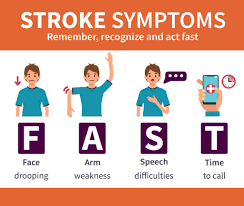

In [26]:
from IPython.display import Image
Image(filename="D:\\IBM_Data_Science\\Image\\Stroke.png",width=700,height=300)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [28]:
data=pd.read_csv("D:\\IBM_Data_Science\\Data_set\\healthcare-dataset-stroke-data.csv")

In [29]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Preprocessing

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [32]:
# Count null value
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

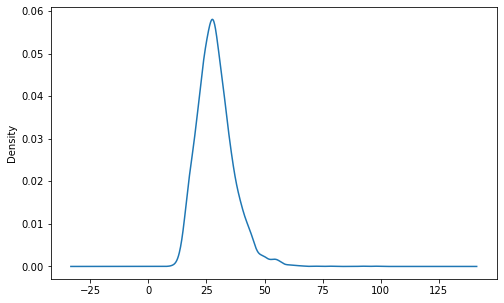

In [33]:
# Checking the distribution of the missing data column
plt.figure(figsize=(8,5))
data['bmi'].plot(kind="kde")
plt.show()

 Checking the distribution of the missing data column i.e bmi

# Missing value Treatmnet

In [34]:
## Replace null values with mean values
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [35]:
## re-checking missing value
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Null values have been replaced with mean values

# Droping unnecessary columns

In [36]:
## Delete column data=['id']
data.drop(['id'],axis=1,inplace=True)

In [37]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# EDA

## Taget variable (Stroke)

**In the chart:**
- 1 represents the number of patients with stroke
- 0 represents the number of patients without stroke

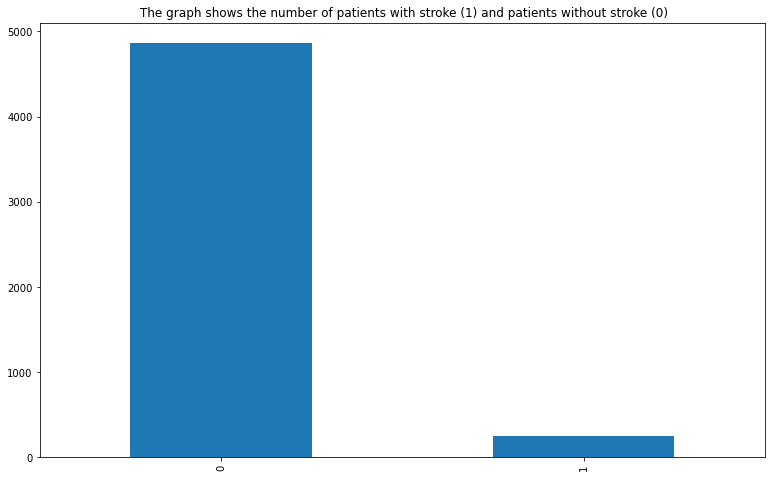

In [44]:

plt.figure(figsize=(13,8))
data['stroke'].value_counts().plot(kind="bar")
plt.title(" The graph shows the number of patients with stroke (1) and patients without stroke (0)")
plt.show()

## Checking outliers in our dataset (Categorical columns)

In [45]:
num=data.select_dtypes(exclude='object')

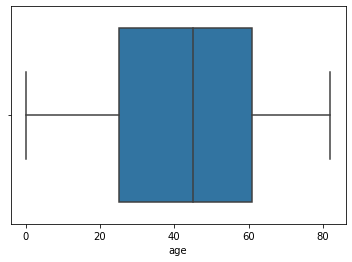

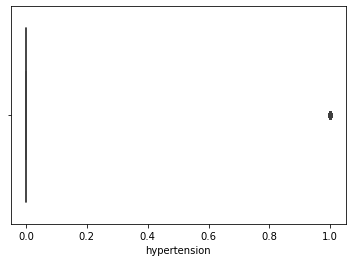

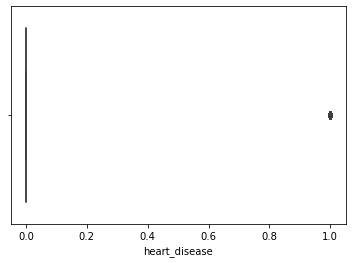

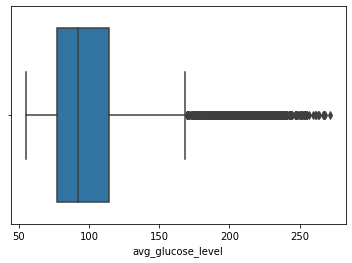

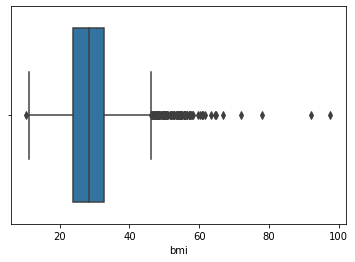

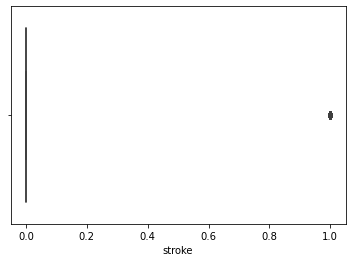

In [46]:
for i in num.columns:
    sns.boxplot(data=num,x=i)
    plt.show()

From the boxplot we can see the outlier appearing in the BMI variable

## Gender


In [49]:
# Here we proceed to the number of patients being Male, Female and other
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Text(0.5, 1.0, 'The number of patients being Male, Female and other')

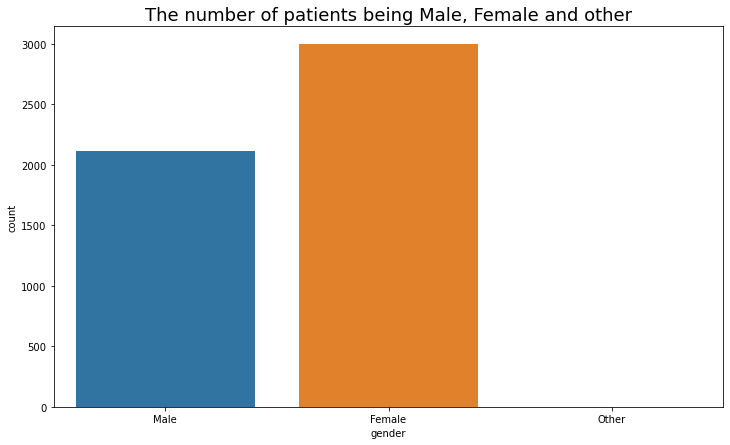

In [60]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x="gender")
plt.title("The number of patients being Male, Female and other",fontsize=18)


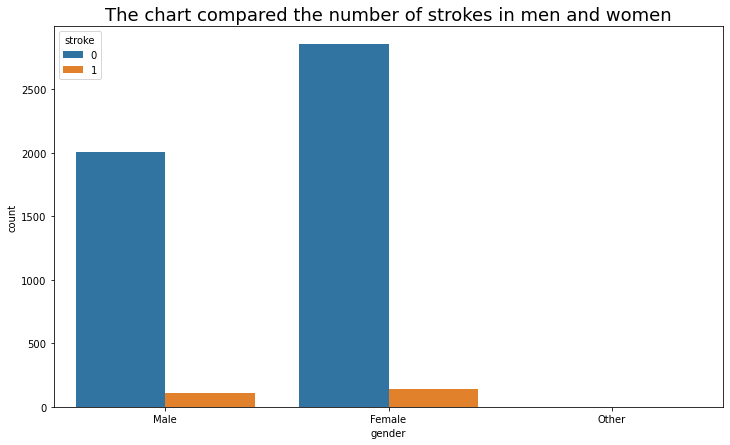

In [63]:
# Next, I compared the number of strokes in men and women
plt.figure(figsize=(12,7))
sns.countplot(data=data,x="gender",hue="stroke")
plt.title("The chart compared the number of strokes in men and women",fontsize=18)
plt.show()

**We can see that:**
- The number of stroke patients in men and women is almost equal
- The total number of female people who go to the doctor is more than male

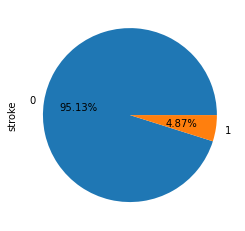

In [65]:
# We conduct a test to see the percentage of people who 
# have a stroke and do not have a stroke
data['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

## Age

In [67]:
# More men than women had strokes
data.groupby('gender').mean()[['age', 'stroke']]

,age,stroke
gender,,
Female,43.757395,0.047094
Male,42.483385,0.051064
Other,26.000000,0.000000


More men than women had stroke attack.

## Ever married

In [70]:
# Number of people married or not
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

**Number of people:**
- Married is: 3353
- Unmarried is: 1757

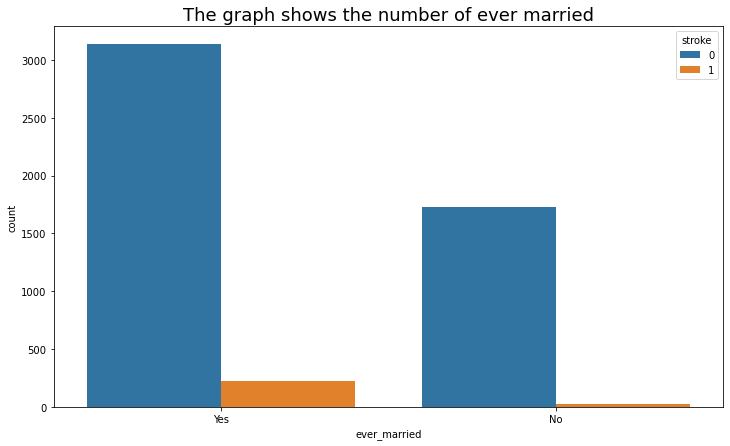

In [73]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='ever_married',hue='stroke')
plt.title("The graph shows the number of ever married",fontsize=18)
plt.show()

## Work Type

In [75]:
# check type
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [76]:
# Count values unique of work_type
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

**We can see:**
- Private : 2925
- Self-employed: 819
- children: 687
- Govt_job: 657
- Never_worked: 22

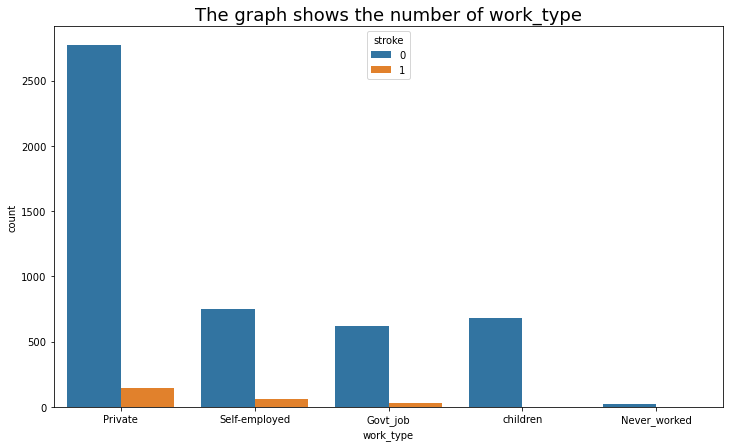

In [77]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='work_type',hue='stroke')
plt.title("The graph shows the number of work_type",fontsize=18)
plt.show()

## Smoking Features

In [78]:
# Number of smokers
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

**Number of people:**
- Never smoked : 1892
- Unknown: 1544
- Formerly smoked : 885
- Smokes: 789

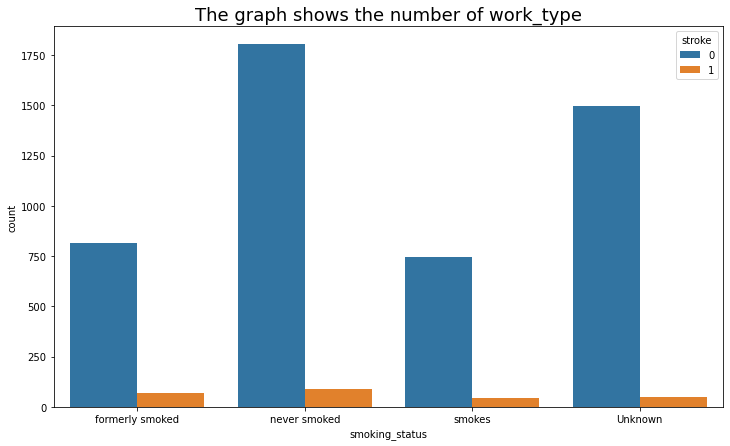

In [79]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='smoking_status',hue='stroke')
plt.title("The graph shows the number of work_type",fontsize=18)
plt.show()

## Heatmap express the correlation ratio between the variables

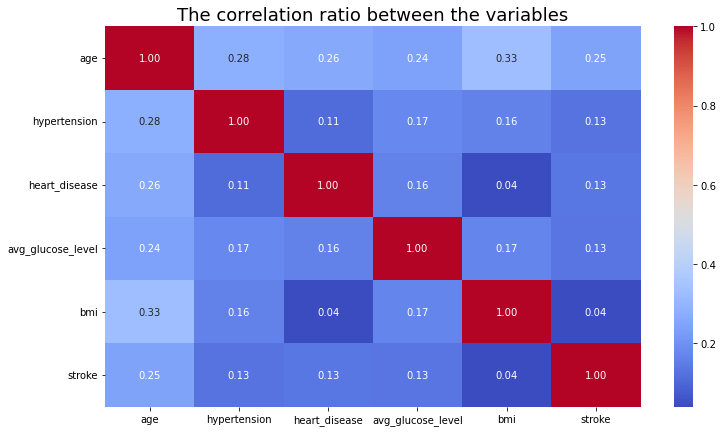

In [82]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap="coolwarm")
plt.title("The correlation ratio between the variables",fontsize=18)
plt.show()


## Encoding the categorical variables

In [83]:
# Check data type
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [84]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [85]:

data['gender'] = lr.fit_transform(data['gender'])
data['ever_married'] = lr.fit_transform(data['ever_married'])
data['work_type'] = lr.fit_transform(data['work_type'])
data['Residence_type'] = lr.fit_transform(data['Residence_type'])
data['smoking_status'] = lr.fit_transform(data['smoking_status'])

## Splitting data into independent and dependent variables

In [86]:
X=data.drop('stroke',axis=1).values
X

array([[  1.        ,  67.        ,   0.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  0.        ,  61.        ,   0.        , ..., 202.21      ,
         28.89323691,   2.        ],
       [  1.        ,  80.        ,   0.        , ..., 105.92      ,
         32.5       ,   2.        ],
       ...,
       [  0.        ,  35.        ,   0.        , ...,  82.99      ,
         30.6       ,   2.        ],
       [  1.        ,  51.        ,   0.        , ..., 166.29      ,
         25.6       ,   1.        ],
       [  0.        ,  44.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [87]:
Y=data['stroke'].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [92]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
classifier = LogisticRegression()

In [95]:
classifier.fit(X_train, Y_train)

LogisticRegression()

In [97]:
predict = classifier.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## Evaluation for Logistic Regression

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [101]:
print(confusion_matrix(Y_test, predict))

[[968   0]
 [ 54   0]]


In [103]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [104]:
print('Accuracy score :',accuracy_score(Y_test, predict))

Accuracy score : 0.9471624266144814


## KNN Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier()

In [108]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [109]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## Evaluation for KNN Classifier

In [112]:
print('Accuracy:',accuracy_score(Y_test, pred))

Accuracy: 0.9422700587084148


## Decision Tree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
classifier = DecisionTreeClassifier(max_depth=3)

In [115]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [116]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## Evaluation for Decision Tree Classifier

In [118]:
print('Accuracy:',accuracy_score(Y_test, Y_pred))

Accuracy: 0.9461839530332681


In [119]:
## Ploting Tree with plot_tree

In [120]:
from sklearn import tree

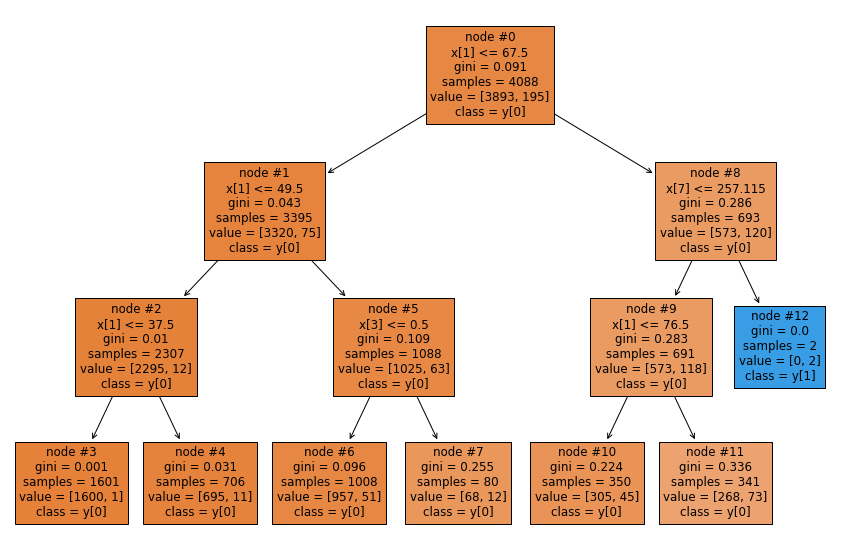

In [121]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,class_names=True,node_ids=True)
plt.show()

## Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
classifier = RandomForestClassifier()

In [124]:
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [125]:

Y_pred1 = classifier.predict(X_test)
Y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## Evaluation for Random Forest Classifie

In [127]:
print('Accuracy:', accuracy_score(Y_pred1, Y_test))

Accuracy: 0.9461839530332681
